# Lab Sheet 5

# Logistic Regression for Classification

# PART A : Prerequisitesfor Logistic Regression implementation

## 1. Plot the attached dataset data1.csvusing scatter plot.  There is a target feature with discrete values 0,1. If the target feature is 1, the samples should be shown as red circle. If the target feature is 0, the samples should be shown as green x

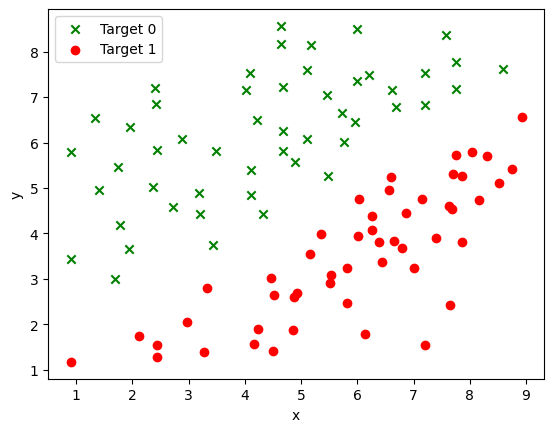

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv')

target_0 = df[df['y'] == 0]
target_1 = df[df['y'] == 1]

plt.scatter(target_0['x1'], target_0['x2'], c='green', marker='x', label='Target 0')
plt.scatter(target_1['x1'], target_1['x2'], c='red', marker='o', label='Target 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2.Plot a line y=(2x+3)

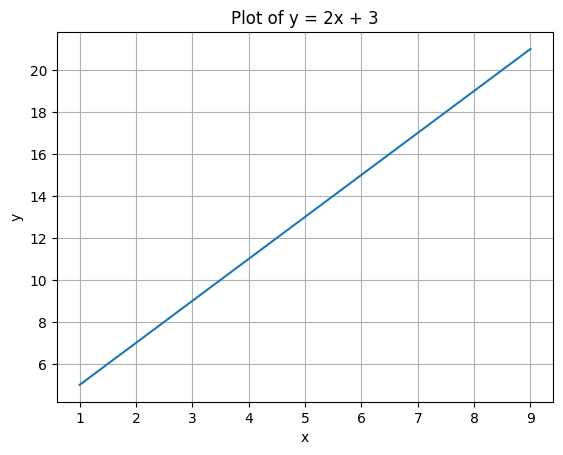

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 9, 100)
y = 2*x + 3

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = 2x + 3')
plt.grid(True)
plt.show()


## 3. Define a function sigmoid(z) that takes one parameter z and computes 1/(1+e^-z).Create a vector  V  with 10  values  randomly  in  the  range  [-1000,1000].  Transform  V  to  V'  that consists of  respective sigmoid  values  using  the  defined  function.  Observe  the  range  of output values in V'.

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

V = np.random.uniform(low=-1000, high=1000, size=10)
V_prime = sigmoid(V)

print(V_prime)


[0.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
 1.00000000e+000 2.71493429e-155]


C:\Users\aadit\AppData\Local\Temp\ipykernel_51280\1455778885.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## 4. Define a function hypothesis(theta, X) that takes two vectors as parameters, theta and X. If sigmoid(theta.X)>= 0.5, output 0 else output 1.

In [18]:
def hypothesis(theta, X):
    sigmoid_value = sigmoid(np.dot(theta, X))
    if sigmoid_value >= 0.5:
        return 0
    else:
        return 1


## 5. Define a function cost(theta,X,y) to compute the error Error = 1/m*Σ-yilog(hθ(xi))-(1-yi)log(1-hθ(xi))Where xi is the ithsample and yi is the ithlabel, hθ(xi) is the hypothesis(theta,xi)

In [19]:
def cost(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    error = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return error


# PART B : Implementation of logistic regression

## 6. Implement gradient descent algorithm for logistic regressionin data set loan_data.csv.read training datasetconvert dataset to a feature matrix Xnormalizing feature matrix Xstack columns with all ones in feature matrix target feature to be taken in a separatevector initial theta values gradient descentupdationDisplay estimated theta values and number of iterations to convergePredictfor test data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_data.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2]:
df.shape

(614, 13)

In [3]:
df['LoanAmount'] =df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History']).median()
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.shape

(542, 13)

In [7]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [9]:
df.Gender =df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [10]:
df.Married =df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [11]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [12]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [13]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [14]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [15]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [16]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [17]:
df['Credit_History'].value_counts()


Credit_History
1.0    542
Name: count, dtype: int64

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 7. Use sklearn built in function to find themodel

In [19]:
from sklearn.linear_model import LogisticRegression 
X, y = df.iloc[:, 1:12], df.iloc[:, 12]
clf =LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :]) 
clf.score(X, y)

InvalidIndexError: (slice(None, 2, None), slice(None, None, None))